In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

df = pd.read_csv("merged_z5.csv")

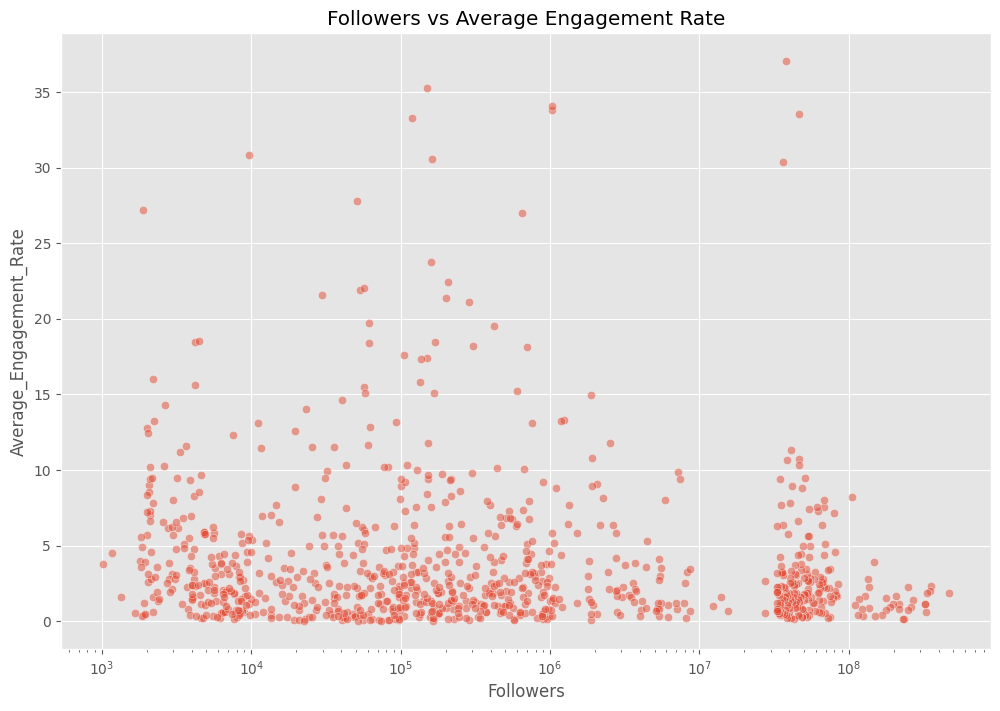

In [3]:
plt.figure(figsize=(12, 8))  
plt.xscale('log')
plt.title("Followers vs Average Engagement Rate")

sns.scatterplot(x="Followers", y="Average_Engagement_Rate", data=df, alpha=0.5)
plt.show()

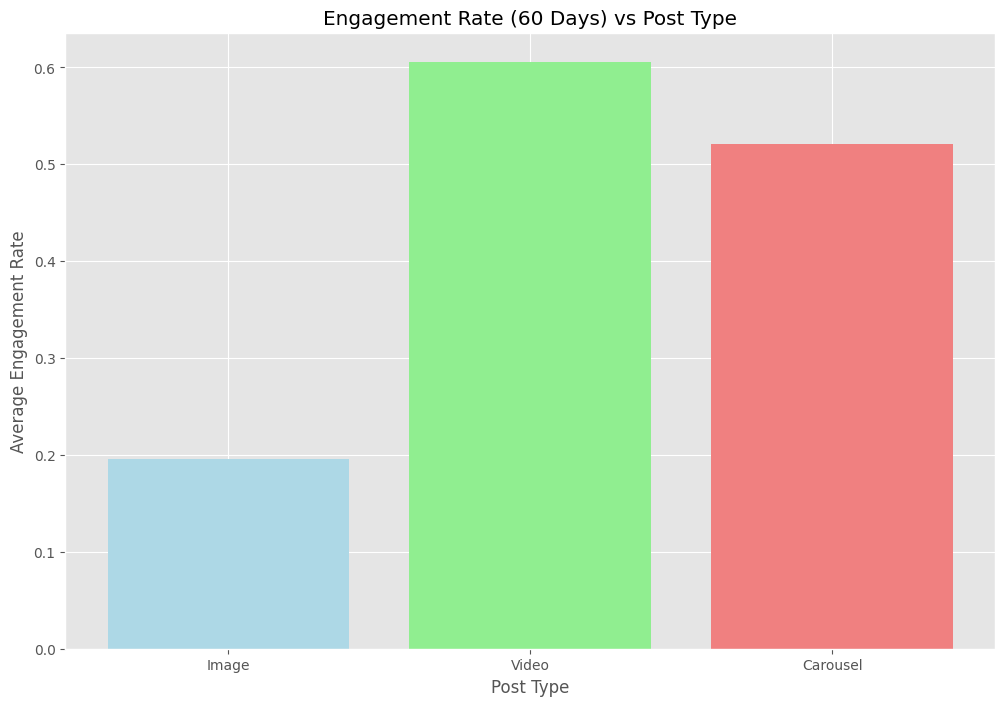

In [13]:
df_image = df[df["Posts_(image)"] > 0].copy()
df_video = df[df["Posts_(videos)"] > 0].copy()
df_carousel = df[df["Posts_(carousel)"] > 0].copy()

df_image["Image_Ratio"] = (df_image["Posts_(image)"] / df_image["Posting_frequency_(last_60_days)"]) * df_image["Engagement_Rate_(60_Days)"]
df_video["Video_Ratio"] = (df_video["Posts_(videos)"] / df_video["Posting_frequency_(last_60_days)"]) * df_video["Engagement_Rate_(60_Days)"]
df_carousel["Carousel_Ratio"] = (df_carousel["Posts_(carousel)"] / df_carousel["Posting_frequency_(last_60_days)"]) * df_carousel["Engagement_Rate_(60_Days)"]

image_mean = df_image["Image_Ratio"].median()
video_mean = df_video["Video_Ratio"].median()
carousel_mean = df_carousel["Carousel_Ratio"].median()

x = ["Image", "Video", "Carousel"]
means = [image_mean, video_mean, carousel_mean]
colors = ["lightblue", "lightgreen", "lightcoral"]

plt.figure(figsize=(12, 8))
plt.title("Engagement Rate (60 Days) vs Post Type")
plt.bar(x, means, color = colors)
plt.xlabel("Post Type")
plt.ylabel("Average Engagement Rate")

plt.show()